<a href="https://colab.research.google.com/github/ajit2001/codsoft_2/blob/main/Movie_Rating_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Movie Rating Prediction

Objective

* Build a model that predicts the rating of a movie based on
features like genre, director, and actors. You can use regression
techniques to tackle this problem.

* The goal is to analyze historical movie data and develop a model
that accurately estimates the rating given to a movie by users or
critics.

* Movie Rating Prediction project enables you to explore data
analysis, preprocessing, feature engineering, and machine
learning modeling techniques.

* It provides insights into the factors
that influence movie ratings and allows you to build a model that
can estimate the ratings of movies accurately.


In [ ]:
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#Data acquisition of the movies dataset
df_movie=pd.read_csv('movies.dat', sep = '::', engine='python', encoding='latin1')
df_movie.columns =['MovieID','Title', 'Category']
df_movie.dropna(inplace=True)
df_movie.head()

,MovieID,Title,Category
0,2,Jumanji (1995),Adventure|Children's|Fantasy
1,3,Grumpier Old Men (1995),Comedy|Romance
2,4,Waiting to Exhale (1995),Comedy|Drama
3,5,Father of the Bride Part II (1995),Comedy
4,6,Heat (1995),Action|Crime|Thriller


In [ ]:
#Data acquisition of the rating dataset
df_rating = pd.read_csv('ratings.dat', sep = '::', engine='python')
# df['TimeStamp'] = pd.to_datetime(unit='s')
df_rating.columns =['UserID','MovieID','Ratings','TimeStamp']
df_rating.dropna(inplace=True)
df_rating.head()

,UserID,MovieID,Ratings,TimeStamp
0,1,661,3,978302109
1,1,914,3,978301968
2,1,3408,4,978300275
3,1,2355,5,978824291
4,1,1197,3,978302268


In [ ]:
# #Data acquisition of the rating dataset
# df_rat = pd.read_csv('ratings.dat', sep = '::', engine='python')
# df_rat['TimeStamp'] = pd.to_datetime(df_rat['TimeStamp'], unit='D')
# df_rat.columns =['ID','MovieID','Ratings','TimeStamp']
# df_rat.dropna(inplace=True)
# df_rat.head()

In [ ]:
#Data acquisition of the users dataset
df_user = pd.read_csv('users.dat', sep = '::', engine='python', encoding='latin1')
df_user.columns =['UserID','Gender','Age','Occupation','Zip-code']
df_user.dropna(inplace=True)
df_user.head()

,UserID,Gender,Age,Occupation,Zip-code
0,2,M,56,16,70072
1,3,M,25,15,55117
2,4,M,45,7,02460
3,5,M,25,20,55455
4,6,F,50,9,55117


In [ ]:
df = pd.concat([df_movie, df_rating, df_user], axis=1)
df.head()

,MovieID,Title,Category,UserID,MovieID,Ratings,TimeStamp,UserID,Gender,Age,Occupation,Zip-code
0,2.0,Jumanji (1995),Adventure|Children's|Fantasy,1,661,3,978302109,2.0,M,56.0,16.0,70072
1,3.0,Grumpier Old Men (1995),Comedy|Romance,1,914,3,978301968,3.0,M,25.0,15.0,55117
2,4.0,Waiting to Exhale (1995),Comedy|Drama,1,3408,4,978300275,4.0,M,45.0,7.0,02460
3,5.0,Father of the Bride Part II (1995),Comedy,1,2355,5,978824291,5.0,M,25.0,20.0,55455
4,6.0,Heat (1995),Action|Crime|Thriller,1,1197,3,978302268,6.0,F,50.0,9.0,55117


In [ ]:
#Merge the ratings and users with movieID and UserID
ratings_user = pd.merge(df_rating, df_user, on=['UserID'])
ratings_movie = pd.merge(df_rating, df_movie, on=['MovieID'])

df_1 = pd.merge(ratings_user, ratings_movie,
                       on=['UserID', 'MovieID', 'Ratings'])[['MovieID', 'Title', 'UserID', 'Age', 'Gender', 'Occupation', "Ratings"]]

df_1.head()

,MovieID,Title,UserID,Age,Gender,Occupation,Ratings
0,1357,Shine (1996),2,56,M,16,5
1,3068,"Verdict, The (1982)",2,56,M,16,4
2,1537,Shall We Dance? (Shall We Dansu?) (1996),2,56,M,16,4
3,647,Courage Under Fire (1996),2,56,M,16,3
4,2194,"Untouchables, The (1987)",2,56,M,16,4


# Data Visualisation

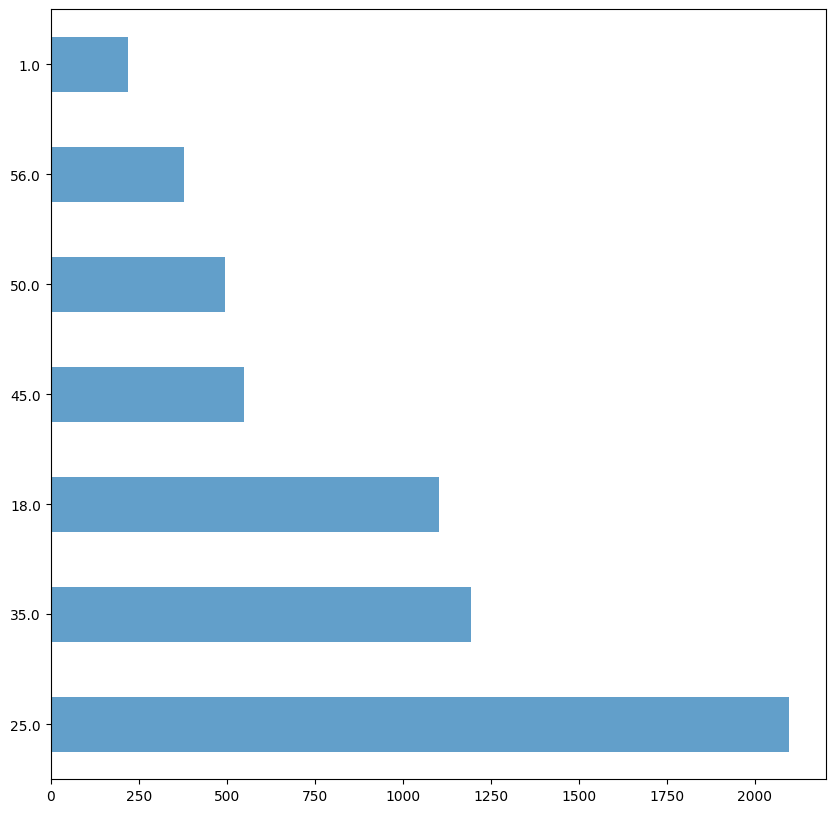

In [ ]:
#Visualize user age distribution
# import matplotlib.cm as cm
# from matplotlib.colors import Normalize

# my_cmap = cm.get_cmap('jet')
# my_norm = Normalize(vmin=0, vmax=8)
df['Age'].value_counts().plot(kind='barh',alpha=0.7,figsize=(10,10))
plt.show()

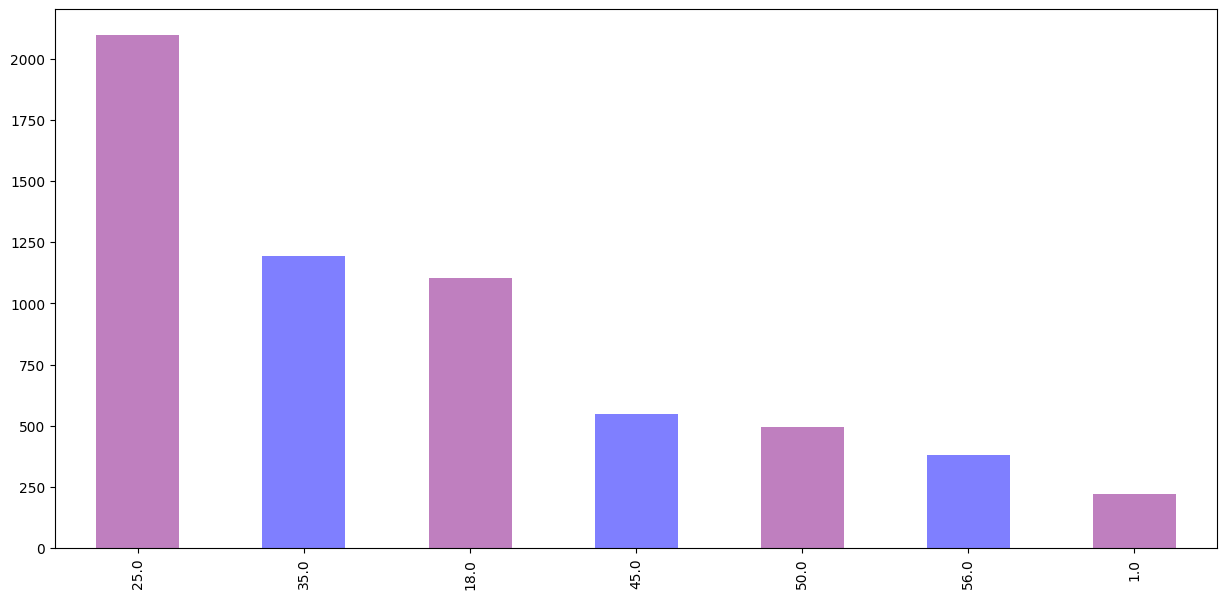

In [ ]:
df['Age'].value_counts().plot(kind='bar', color= ['purple', 'blue'], alpha=0.5, figsize=(15,7))
plt.show()

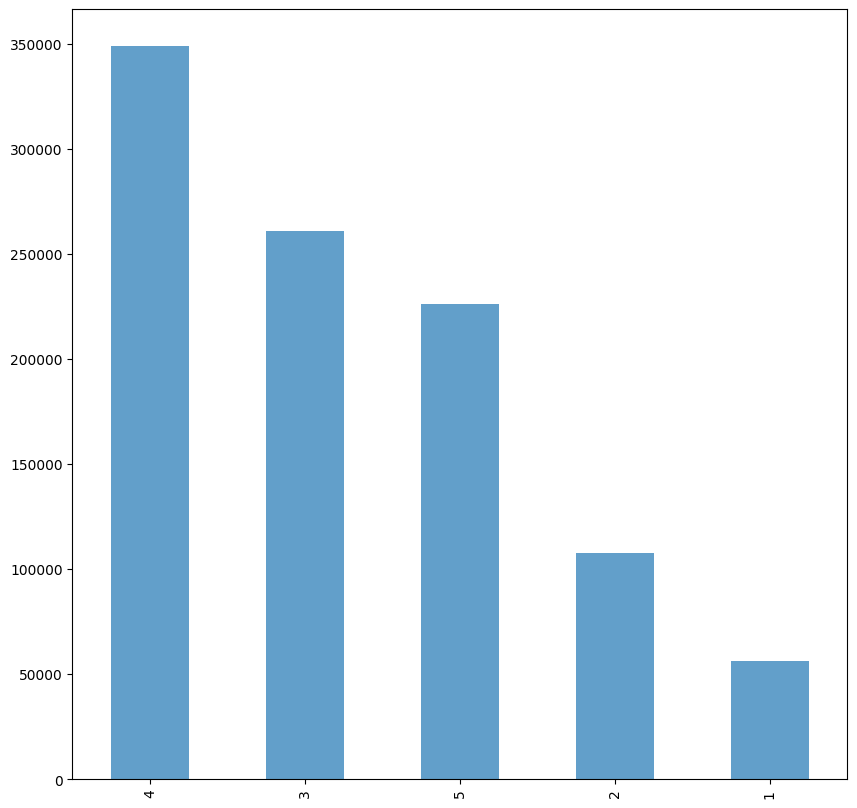

In [ ]:
#Visualize overall rating by users
df['Ratings'].value_counts().plot(kind='bar', alpha=0.7, figsize=(10,10))
plt.show()

Text(0.5, 0, 'Age')

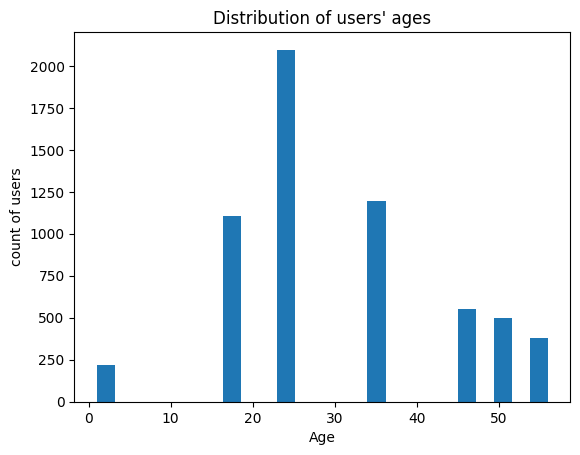

In [ ]:
df.Age.plot.hist(bins=25)
plt.title("Distribution of users' ages")
plt.ylabel('count of users')
plt.xlabel('Age')

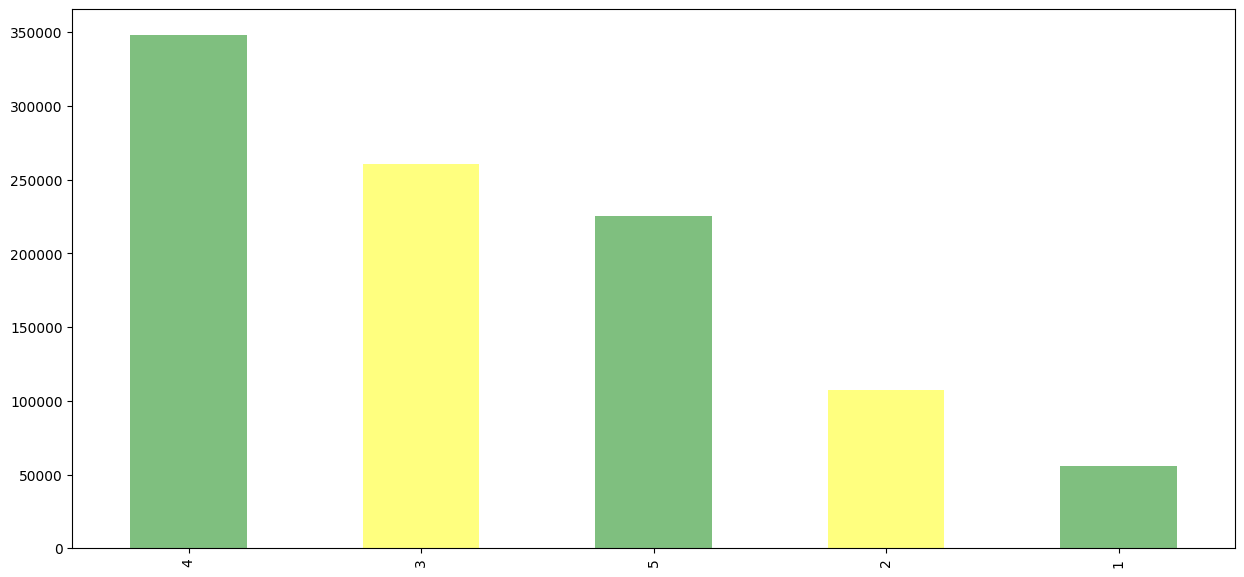

In [ ]:
df_1['Ratings'].value_counts().plot(kind='bar', color=['green', 'yellow'], alpha=0.5, figsize=(15,7))
plt.show()

In [ ]:
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
df['age_group'] = pd.cut(df.Age, range(0, 81, 10), right=False, labels=labels)
df[['Age', 'age_group']].drop_duplicates().dropna()[:10]

,Age,age_group
0,56.0,50-59
1,25.0,20-29
2,45.0,40-49
4,50.0,50-59
5,35.0,30-39
16,18.0,10-19
17,1.0,0-9


In [ ]:
groupedby_movieName = df.groupby('Title')
groupedby_rating = df.groupby('Ratings')
groupedby_uid = df_1.groupby('UserID')
groupedby_uid.head().drop_duplicates()
#groupedby_age = df.loc[most_50.index].groupby(['MovieName', 'age_group'])

In [ ]:
movies = df.groupby('Title').size().sort_values(ascending=True)[:1000]
print(movies.head(20))

Title
$1,000,000 Duck (1971)                               1
Only Angels Have Wings (1939)                        1
Only You (1994)                                      1
Open Season (1996)                                   1
Open Your Eyes (Abre los ojos) (1997)                1
Operation Condor (Feiying gaiwak) (1990)             1
Operation Condor 2 (Longxiong hudi) (1990)           1
Operation Dumbo Drop (1995)                          1
Opportunists, The (1999)                             1
Opposite of Sex, The (1998)                          1
Ordinary People (1980)                               1
Orgazmo (1997)                                       1
Original Gangstas (1996)                             1
Onegin (1999)                                        1
Original Kings of Comedy, The (2000)                 1
Oscar and Lucinda (a.k.a. Oscar & Lucinda) (1997)    1
Otello (1986)                                        1
Othello (1952)                                       1
Othe

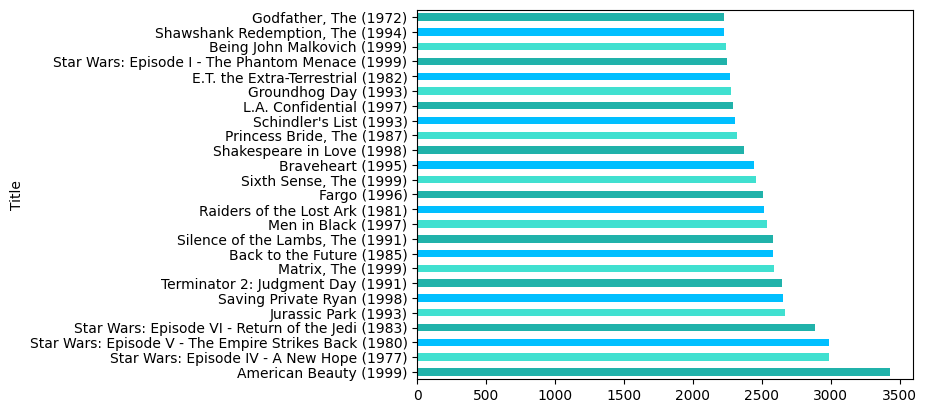

In [ ]:
#Top 25 movies by viewership rating

res = master_data.groupby("Title").size().sort_values(ascending=False)[:25]
plt.ylabel("Title")
plt.xlabel("Viewership Count")
res.plot(kind="barh", color = ['lightseagreen', 'turquoise', 'deepskyblue'])
plt.show()

In [ ]:
ToyStory_data = groupedby_movieName.get_group('Toy Story 2 (1999)')
ToyStory_data.shape

(1, 13)

Age
18    34
25    72
35    29
45    12
50     4
56     7
Name: MovieID, dtype: int64

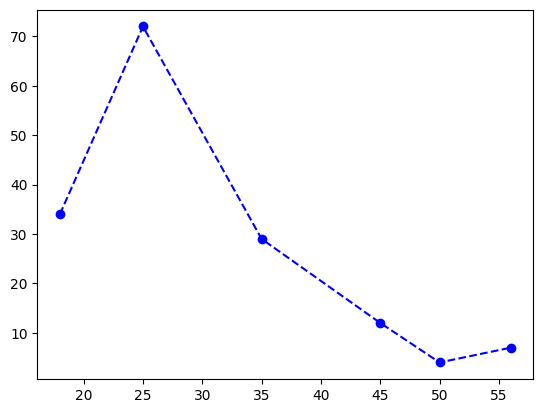

In [ ]:
#User rating of the movie “Toy Story”

res = df_1[df_1.Title == "Only You (1994)"]

plt.plot(res.groupby("Age")["MovieID"].count(),'--bo')
res.groupby("Age")["MovieID"].count()

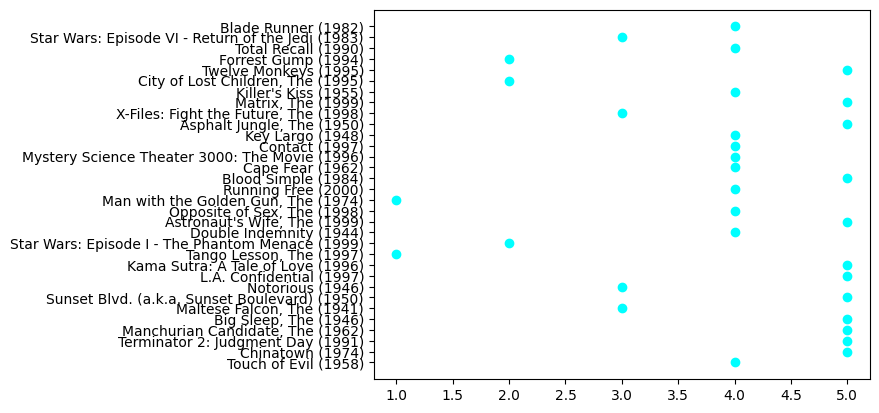

In [ ]:
res = df_1[df_1.UserID == 700]

plt.scatter(y=res.Title, x=res.Ratings , color = 'aqua')
plt.show()

# Machine Learning

In [ ]:
#First 500 extracted records
import warnings
warnings.filterwarnings('ignore')

first_500 = df[500:]
first_500.dropna(inplace=True)

In [ ]:
# #First 500 extracted records
# import warnings
# warnings.filterwarnings('ignore')

# f_500 = df_1[500:]
# f_500.dropna(inplace=True)

In [ ]:
#Use the following features:movie id,age,occupation
features = first_500[['MovieID','Age','Occupation']].values

#Use rating as label
labels = first_500[['Ratings']].values

In [ ]:
# #Use the following features:movie id,age,occupation
# features_1 = f_500[['MovieID','Age','Occupation']].values

# #Use rating as label
# labels_1 = f_500[['Ratings']].values

In [ ]:
#Create train and test data set
train, test, train_labels, test_labels = train_test_split(features, labels, test_size=0.33, random_state=42)

In [ ]:
# train_1, test_1, train_labels_1, test_labels_1 = train_test_split(features_1, labels_1, test_size=0.33, random_state=42)

# Machine Learning Models

Logistic Regression

In [ ]:
logreg = LogisticRegression()
logreg.fit(train, train_labels)
Y_pred = logreg.predict(test)
acc_log = round(logreg.score(train, train_labels) * 100, 2)
acc_log

33.77

In [ ]:
# logreg_1 = LogisticRegression()
# logreg_1.fit(train_1, train_labels_1)
# Y_pred_1 = logreg_1.predict(test_1)
# acc_log_1 = round(logreg_1.score(train_1, train_labels_1) * 100, 2)
# acc_log_1

34.86

Decision Tree

In [ ]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(train, train_labels)
Y_pred = decision_tree.predict(test)
acc_decision_tree = round(decision_tree.score(train, train_labels) * 100, 2)
acc_decision_tree

100.0

In [ ]:
# decision_tree_1 = DecisionTreeClassifier()
# decision_tree_1.fit(train_1, train_labels_1)
# Y_pred_1 = decision_tree_1.predict(test_1)
# acc_decision_tree_1 = round(decision_tree_1.score(train_1, train_labels_1) * 100, 2)
# acc_decision_tree_1

56.54

Random Forest

In [ ]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(train, train_labels)
Y_pred = random_forest.predict(test)
random_forest.score(train, train_labels)
acc_random_forest = round(random_forest.score(train, train_labels) * 100, 2)
acc_random_forest

100.0

In [ ]:
# random_forest_1 = RandomForestClassifier(n_estimators=100)
# random_forest_1.fit(train_1, train_labels_1)
# Y_pred = random_forest_1.predict(test_1)
# random_forest_1.score(train_1, train_labels_1)
# acc_random_forest_1 = round(random_forest_1.score(train_1, train_labels_1) * 100, 2)
# acc_random_forest_1

56.54

K-Nearest Neighbors Classifier

In [ ]:
# K Nearest Neighbors Classifier

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(train, train_labels)
Y_pred = knn.predict(test)
acc_knn = round(knn.score(train, train_labels) * 100, 2)
acc_knn

60.53

In [ ]:
# knn = KNeighborsClassifier(n_neighbors = 3)
# knn.fit(train_1, train_labels_1)
# Y_pred = knn.predict(test_1)
# acc_knn_1 = round(knn.score(train_1, train_labels_1) * 100, 2)
# acc_knn_1

44.79

Gaussian Naive Bayes

In [ ]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(train, train_labels)
Y_pred = gaussian.predict(test)
acc_gaussian = round(gaussian.score(train, train_labels) * 100, 2)
acc_gaussian

35.01

Support Vector Machine

In [ ]:
# Support Vector Machines

svc = SVC()
svc.fit(train, train_labels)
Y_pred = svc.predict(test)
acc_svc = round(svc.score(train, train_labels) * 100, 2)
acc_svc

34.61

Perceptron

In [ ]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(train, train_labels)
Y_pred = perceptron.predict(test)
acc_perceptron = round(perceptron.score(train, train_labels) * 100, 2)
acc_perceptron

31.66

Stochastic Gradient Descent

In [ ]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(train, train_labels)
Y_pred = sgd.predict(test)
acc_sgd = round(sgd.score(train, train_labels) * 100, 2)
acc_sgd

21.55

In [ ]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'KNN',
              'Naive Bayes', 'Support Vector Machines', 'Perceptron', 'Stochastic Gradient Decent'],
    'Score': [acc_log, acc_decision_tree, acc_random_forest, acc_knn, acc_gaussian, acc_svc, acc_perceptron,
              acc_sgd]})
models.sort_values(by='Score', ascending=False)

,Model,Score
1,Decision Tree,100.00
2,Random Forest,100.00
3,KNN,60.53
4,Naive Bayes,35.01
0,Logistic Regression,34.86
5,Support Vector Machines,34.61
6,Perceptron,31.66
7,Stochastic Gradient Decent,21.55
